0. Import packages

In [2]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

1. input and output

In [4]:
input = '20190605_wbs1_multi_ortho_nad83z11_shift_pf21_b123_8bit.tif'
output = '20190605_wbs1_multi_ortho_nad83z11_shift_pf21_b123_8bit_stretched_output.tif'

In [5]:
# Open the GeoTIFF file
with rasterio.open( input ) as src:
    # Get metadata and the number of bands
    metadata = src.meta
    num_bands = src.count
    
    # Read each band and apply contrast stretching
    stretched_image = np.zeros((num_bands, src.height, src.width), dtype=np.uint8)
    
    for band in range(1, num_bands + 1):
        # Read the current band
        image = src.read(band)
        
        # Get the min and max values of the current band
        min_val = np.min(image)
        max_val = np.max(image)
        
        # Perform the linear contrast stretching
        stretched_image[band - 1] = ((image - min_val) / (max_val - min_val)) * 255  # scale to 0-255

    # Save the contrast-stretched image to a new GeoTIFF
    metadata.update(dtype=rasterio.uint8, count=num_bands)  # Update metadata to match the result

    with rasterio.open( output , 'w', **metadata) as dst:
        for band in range(1, num_bands + 1):
            dst.write(stretched_image[band - 1], band)

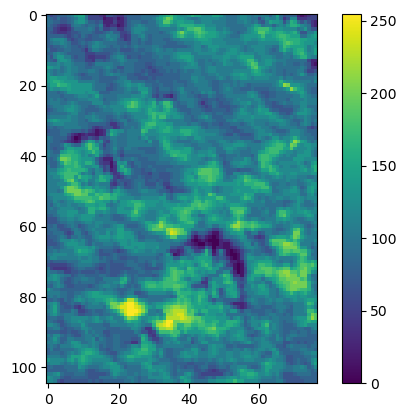

In [6]:
plt.imshow(stretched_image[1]
          # , cmap='gray'
          )
plt.colorbar()
plt.show()